# Example - Getting Files via Flywheel Export

This example notebook shows:

* How to reference a Storage Destination with data that was populated using Project Export.
* How to use the Flywheel Storage Client to interact with the bucket defined at the Storage Destination.




This notebook can be downloaded and run as-is within the Flywheel Notebook environment without any package dependencies.

It uses the MedNIST data set, which can be ingested using this tutorial notebook: [MedNIST dataset ingestion to Flywheel](https://gitlab.com/flywheel-io/scientific-solutions/tutorials/notebooks/MedNIST/-/blob/main/1_ingest.ipynb?ref_type=heads)

The dataset is kindly made available by Dr. Bradley J. Erickson M.D., Ph.D. (Department of Radiology, Mayo Clinic) under the Creative Commons CC BY-SA 4.0 license.If you use the MedNIST dataset, please acknowledge the source.

*This notebook assumes familiarity with Flywheel Export and depends on a populated Storage Destination which has scope at the group or project level*

In [1]:
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

## Referencing the Storage Destination

Specifiy the prefix you specified during the Flywheel Export.  For example, if your 'destination path format' was:

{project.label}/{session.label}/{acquisition.label}/{file.name}

Make the BUCKET_PREFIX the project label.

In [2]:
BUCKET_PREFIX = 'MedNIST' # Use the prefix you specify in the export.

## Create a data frame of the bucket contents

Flywheel provides the [fw-storage](https://pypi.org/project/fw-storage/) client that allows for interaction with configured Export buckets/blobs. Pre-initialized as `fs`.


In [3]:
# Get the list of the contents of the bucket
elements = fs.ls(BUCKET_PREFIX)

In [4]:
# build up a data frame with required info
df_dict = {"image":[], "session":[],"acquisition":[],"label":[]}
for a in elements:
    df_dict['image'].append(a.path)
    sub = str(a.path[len(BUCKET_PREFIX)+1:]).split('/')
    #print(sub)
    df_dict['session'].append(sub[0])
    df_dict['acquisition'].append(sub[1])
    df_dict['label'].append(sub[2])
    
df = pd.DataFrame(df_dict)

In [5]:
display(df)

image session acquisition   
0          MedNIST/ses_1/000037/ChestCT/000037.jpeg   ses_1      000037  \
1      MedNIST/ses_1/000037/ChestCT/000037_norm.png   ses_1      000037   
2           MedNIST/ses_1/000129/HeadCT/000129.jpeg   ses_1      000129   
3       MedNIST/ses_1/000129/HeadCT/000129_norm.png   ses_1      000129   
4              MedNIST/ses_1/000325/CXR/000325.jpeg   ses_1      000325   
..                                              ...     ...         ...   
195  MedNIST/ses_1/009739/AbdomenCT/009739_norm.png   ses_1      009739   
196           MedNIST/ses_1/009791/Hand/009791.jpeg   ses_1      009791   
197       MedNIST/ses_1/009791/Hand/009791_norm.png   ses_1      009791   
198        MedNIST/ses_1/009993/ChestCT/009993.jpeg   ses_1      009993   
199    MedNIST/ses_1/009993/ChestCT/009993_norm.png   ses_1      009993   

         label  
0      ChestCT  
1      ChestCT  
2       HeadCT  
3       HeadCT  
4          CXR  
..         ...  
195  AbdomenCT  
196       Hand  
197       Hand  
198    ChestCT  
199    ChestCT  

[200 rows x 4 columns]

## Read a sample of the images in the bucket and display

In [6]:
def read_bucket_image(path):
    f = fs.get(path)
    img = Image.open(f)
    return img

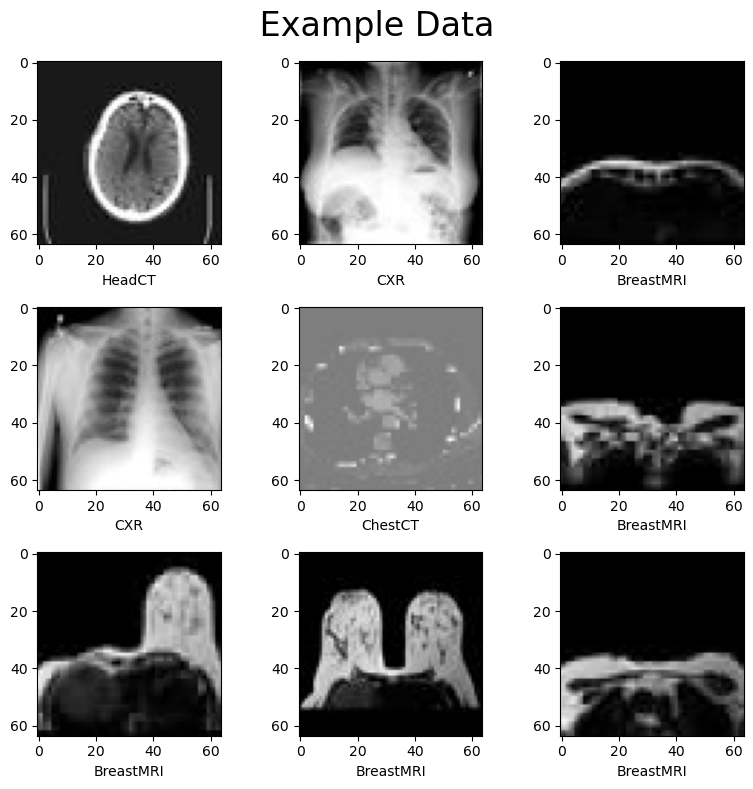

In [7]:
fig,ax = plt.subplots(3, 3, figsize=(8, 8))
fig.suptitle(' Example Data ', fontsize=24)
for i, k in enumerate(np.random.randint(len(df), size=9)):
    im = read_bucket_image(df['image'][k])
    arr = np.array(im)
    plt.subplot(3, 3, i + 1)
    plt.xlabel(str(df['label'][k]))
    plt.imshow(arr, cmap="gray", vmin=0, vmax=255)
plt.tight_layout()

plt.show()